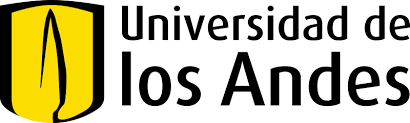

IIND-2104. Modelos Probabilisticos

<h1 style="color: #ADD8E6;">Complementaria 2</h1>

El objetivo de esta complementaria es aprender a definir y manejar matrices en Python. El uso de matrices aplicado a la construcción de Cadenas de Markov también será tratado a lo largo de la complementaria.

<h3 style="color: #ADD8E6;">Manejo de matrices
</h3>

Para crear y realizar operacionessobre matrices en Python utilzaremos la libreria `mumpy` que se abreviara como `np`.

In [1]:
import numpy as np

Existen diferentes formas para crear matrices en Python. Aqui hay algunos ejemplos: 

1. Se puede crear una matriz a partir de varias listas:

In [2]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


2. Se puede crear una matriz llena de ceros: (Cabe aclarar que esta forma de crear la matriz sera de suma utilidad cuando estemos definiendo las cadenas de Markov)

In [3]:
matrix2 = np.zeros((3, 3))  # Matriz 3x3 de ceros
print(matrix2)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. Crear una matriz identidad (Util para realizar analisis de tiempos)

In [4]:
matrix3 = np.eye(4)  # Matriz identidad 4x4
print(matrix3)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Para acceder a un elemento de una matriz se deben utilizar los indices del respectivo elemento. Se debe tener cuidado ya que los indices en Python empiezan en 0, asi que si, por ejemplo, se quiere acceder a la fila `1` se debe utilizar el `0`. 

In [5]:
# Accede al elemento en la fila 1, columna 2
elemento = matrix[0, 1]
elemento

2

Tambien se puede extraer filas o columnas de la siguiente manera:

In [6]:
# Extraer la primera fila de 'matrix'.
fila1 = matrix[0,:]
fila1

# Extraer la tercera columna de 'matrix'.
columna2 = matrix[:,2]
columna2

array([3, 6, 9])

De igual manera se pueden agregar filas o columnas con la función `append`. En el caso de que se quiera agregar una nueva fila el parametro `axis` de la funcion `append` debe ser igual a `0`, en el caso de que se quiera agregar una nueva columna, `axis` debe ser igual a `1`.

In [7]:
# Nueva fila que se quiere agregar.
nueva_fila = np.array([10,11,12])

# Agregar la nueva fila a la matriz
matrix_con_fila = np.append(matrix, [nueva_fila], axis = 0)
matrix_con_fila

# Nueva columna que se quiere agregar.
nueva_columna = np.array([[13], [14], [15]])

# Agregar la nueva columna a la matriz
matrix_con_columna = np.append(matrix, nueva_columna, axis = 1)
matrix_con_columna

array([[ 1,  2,  3, 13],
       [ 4,  5,  6, 14],
       [ 7,  8,  9, 15]])

<h3 style="color: #ADD8E6;">Operaciones matriciales
</h3>

A modo de ejemplo, se crearan dos matrices llenas de números aleatorios que siguen una distribución normal generados por el comando `random.normal` de la libreria numpy que tiene como parametros la media, la desviación estandar y el tamaño de la matriz 

In [8]:
A = np.random.normal(loc = 20, scale = 8, size = (6,6))
B = np.random.normal(loc = 10, scale = 3, size = (6,6))

A continuación, se encuentran algunos comandos de interes que nos permiten realizar operaciones matriciales en Python

| Comando | Explicación |
|:---:|:---:|
| `A.T` | Transpuesta de la matriz A |
| `A + B` | Suma elemento a elemento de las matrices A y B |
| `A - B` | Resta elemento a elemento de las matrices A y B |
| `A @ B` | Producto matricial de A por B |
| `A * B` | Producto elemento a elemento de A por B |
| `np.linalg.det(A)` | Determina el determinante de la matriz cuadrada A |
| `np.linalg.inv(A)` | Calcula la matriz inversa de la matriz cuadrada A |
| `np.linalg.solve(A, b)` | Resuelve el sistema de ecuaciones lineales Ax = b |
| `np.linalg.eig(A)` | Calcula los valores y vectores propios de la matriz cuadrada A |
| `np.diag(A)` | Extrae la diagonal principal de la matriz A como un vector |
| `A.sum(axis = 1)` | Calcula la suma de los elementos de cada fila de la matriz A |


<h3 style="color: #ADD8E6;">Cadenas de Markov</h3>

El uso de matrices sirve para definir la representación de una cadena de Markov en Python. Por ejemplo, en las cadenas continuas es posible definir la matriz generadora (o de tasas de transición) **Q** y en las discretas se define la matriz de probabilidades de transición a un paso **P**. En Python se utilizara la libreria **jmarkov**

>**¡Ponte a prueba!**.
>Modela la evolución del Índice de calidad del aire (ICA) como una cadena de Markov.

En primer lugar, se modela la situación como una cadena de Markov de tiempo discreto. Se define la variable de estado y el espacio de estados correspondiente.

$$
I_n = \text{Nivel del ICA en el n-ésimo día}
$$

$$
S_I = \{1, 2, 3, 4, 5\}
$$


Es importante considerar que, en el espacio de estados, los niveles de calidad del aire aparecen en orden creciente de empeoramiento: el estado 1 corresponde a la clase Buena y el estado 5 a Muy dañina para la salud.

Como es una cadena de Markov en tiempo discreto (CMTD) se debe definir la matriz P. Las probabilidades de transición en un paso entre estados de la cadena de Markov discreta son las siguientes:

$$
P_{i \rightarrow j} = \begin{cases}
0.5 & \text{si } j = i + 1, i < 5 \\
0.3 & \text{si } j = i, 1 < i < 5 \\
0.2 & \text{si } j = i - 1, i > 1 \\
0.5 & \text{si } j = i = 1 \\
0.8 & \text{si } j = i = 5 \\
0 & \text{dlc}
\end{cases}
$$


Para crear matrices en Python, utilizaremos la biblioteca `numpy`, que se emplea para trabajar con matrices y realizar cálculos numéricos de manera eficiente. Esta biblioteca se abrevia comúnmente como `np`.

In [9]:
# Importar las librerias necesarias.

import numpy as np

A continuación, se implementa esta CMTD en Python. Se empieza creando la matriz de probabilidades de transición que se llamara `matriz`:

In [11]:
filas = 5
columnas = 5

# Crear una matriz de ceros de 5x5
matriz = np.zeros((filas, columnas), dtype = float)

Ahora, se recorren las filas y columnas de la matriz para llenarla de acuerdo a la formulación general definida previamente.

In [12]:
# Llenar la matriz con valores
for i in range(filas):
    for j in range(columnas):
        if j == i + 1 and i < filas - 1:
            matriz[i, j] = 0.5
        elif j == i and i > 0 and i < filas - 1:
            matriz[i, j] = 0.3
        elif j == i - 1 and i > 0:
            matriz[i, j] = 0.2
        elif i == j == 0:
            matriz[i, j] = 0.5
        elif i == j == filas - 1:
            matriz[i, j] = 0.8

print(matriz)

# Verificación de que las filas de la matriz suman 1.
matriz.sum(axis = 1)


[[0.5 0.5 0.  0.  0. ]
 [0.2 0.3 0.5 0.  0. ]
 [0.  0.2 0.3 0.5 0. ]
 [0.  0.  0.2 0.3 0.5]
 [0.  0.  0.  0.2 0.8]]


array([1., 1., 1., 1., 1.])